In [233]:
# First Import required packages
import pandas as pd

# to pickle the output trained model 
import pickle as pkl

In [234]:
df = pd.read_csv('ipl.csv')
pd.set_option('display.max_columns', None)

In [235]:
df.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


In [236]:

df.tail()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
76009,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,121,7,19.2,40,0,40,12,129
76010,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,127,7,19.3,46,0,46,12,129
76011,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,128,7,19.4,47,0,47,12,129
76012,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,MG Johnson,DT Christian,129,7,19.5,48,0,47,13,129
76013,617,2017-05-21,"Rajiv Gandhi International Stadium, Uppal",Mumbai Indians,Rising Pune Supergiant,KH Pandya,DT Christian,129,8,19.6,47,1,47,13,129


# Data Preprocessing and Cleaning

## Impoertant:
- This project mainly deals with predicting score based on a timestamp of scorecard.
    - For example: if team A is batting well, say 70-0 at 7 overs, what can be the prdction at the end of 20 overs.
    - This would mean some of the paramameters listed below are not necessary or irrelavant features 

        - Some columns/features like mid, batsman, bowlerm striker and non striker doesnot account for the overall runs score.
        - I do agree that the batsman who is pretty good at slog over is still at the crease the situation can be something else, but for siplicity we generalize this based on the wickets lost.
- Vennue plays an important role because the pitch, dimension of the stadium also contribute to a huge extent

In [237]:
feature_to_remove = ['mid', 'batsman', 'bowler', 'striker', 'non-striker', 'venue']
# Remove the features that are not required for training
df = df.drop(feature_to_remove, axis=1)

In [238]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
0,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.1,1,0,222
1,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,1,0,0.2,1,0,222
2,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.2,2,0,222
3,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.3,2,0,222
4,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,2,0,0.4,2,0,222


In [239]:
# The second problem with the data set is that some teams where just briefly allowed to patricipate in the IPL for various reason and  henve we can drop those teams
teams_to_remove = ['Kochi Tuskers Kerala', 'Rising Pune Supergiant', 'Deccan Chargers', 'Pune Warriors', 'Gujarat Lions', 'Rising Pune Supergiants']
# Remove the teams that are not required for training
df = df[~df['bat_team'].isin(teams_to_remove)]
df = df[~df['bowl_team'].isin(teams_to_remove)]

In [240]:
df.head()
df.tail()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
75884,2017-05-19,Kolkata Knight Riders,Mumbai Indians,106,9,18.1,29,4,107
75885,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.2,29,4,107
75886,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.3,28,4,107
75887,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,9,18.4,24,4,107
75888,2017-05-19,Kolkata Knight Riders,Mumbai Indians,107,10,18.5,23,5,107


In [241]:
df.info()
df['bat_team'].unique()

<class 'pandas.core.frame.DataFrame'>
Index: 53811 entries, 0 to 75888
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            53811 non-null  object 
 1   bat_team        53811 non-null  object 
 2   bowl_team       53811 non-null  object 
 3   runs            53811 non-null  int64  
 4   wickets         53811 non-null  int64  
 5   overs           53811 non-null  float64
 6   runs_last_5     53811 non-null  int64  
 7   wickets_last_5  53811 non-null  int64  
 8   total           53811 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 4.1+ MB


array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Sunrisers Hyderabad'], dtype=object)

# Rename Some teams as they eveolved over time

In [242]:
rename_dict = {'Kings XI Punjab': 'Punjab Kings',
               'Royal Challengers Bangalore': 'Royal Challengers Bengaluru',
               'Delhi Daredevils': 'Delhi Capitals'}
df['bat_team'] = df['bat_team'].replace(rename_dict)
df['bowl_team'] = df['bowl_team'].replace(rename_dict)


In [243]:
df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Punjab Kings', 'Royal Challengers Bengaluru',
       'Delhi Capitals', 'Sunrisers Hyderabad'], dtype=object)

# Minimum number of overs required for prediction

- We need minimum of data for 5 overs

In [244]:
df = df[df['overs']>5.0]

In [245]:
df.head()

,date,bat_team,bowl_team,runs,wickets,overs,runs_last_5,wickets_last_5,total
32,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,61,0,5.1,59,0,222
33,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,61,1,5.2,59,1,222
34,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,61,1,5.3,59,1,222
35,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,61,1,5.4,59,1,222
36,2008-04-18,Kolkata Knight Riders,Royal Challengers Bengaluru,61,1,5.5,58,1,222


In [246]:
# One hot encoding the categorical features
df = pd.get_dummies(df, columns=['bat_team', 'bowl_team'])

In [247]:
df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Punjab Kings,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bengaluru,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Punjab Kings,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bengaluru,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [248]:
# Rearrage columns to leave the total colum to last for creating datadet for training and testing
cols = df.columns.tolist()

In [249]:
from datetime import datetime
df['date'] = df['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [250]:
df.head()

,date,runs,wickets,overs,runs_last_5,wickets_last_5,total,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Punjab Kings,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bengaluru,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Punjab Kings,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bengaluru,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,222,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,222,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,222,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,222,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,222,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False


In [251]:
X_train = df.drop(['total'], axis=1)[df['date'].dt.year < 2017]

In [252]:
X_train

,date,runs,wickets,overs,runs_last_5,wickets_last_5,bat_team_Chennai Super Kings,bat_team_Delhi Capitals,bat_team_Kolkata Knight Riders,bat_team_Mumbai Indians,bat_team_Punjab Kings,bat_team_Rajasthan Royals,bat_team_Royal Challengers Bengaluru,bat_team_Sunrisers Hyderabad,bowl_team_Chennai Super Kings,bowl_team_Delhi Capitals,bowl_team_Kolkata Knight Riders,bowl_team_Mumbai Indians,bowl_team_Punjab Kings,bowl_team_Rajasthan Royals,bowl_team_Royal Challengers Bengaluru,bowl_team_Sunrisers Hyderabad
32,2008-04-18,61,0,5.1,59,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
33,2008-04-18,61,1,5.2,59,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
34,2008-04-18,61,1,5.3,59,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
35,2008-04-18,61,1,5.4,59,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
36,2008-04-18,61,1,5.5,58,1,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68857,2016-05-29,194,7,19.2,54,4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
68858,2016-05-29,200,7,19.3,56,4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
68859,2016-05-29,201,7,19.4,56,4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False
68860,2016-05-29,202,7,19.5,57,4,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False


In [253]:
X_test = df.drop(['total'], axis=1)[df['date'].dt.year >= 2017]

In [254]:
y_train = df['total'][df['date'].dt.year < 2017]
y_test = df['total'][df['date'].dt.year >= 2017]

In [255]:
y_train

32       222
33       222
34       222
35       222
36       222
        ... 
68857    208
68858    208
68859    208
68860    208
68861    208
Name: total, Length: 37310, dtype: int64

In [256]:
# Drop date as it is not required for training
X_train = X_train.drop(['date'], axis=1)
X_test = X_test.drop(['date'], axis=1)

In [257]:
X_test.all()

runs                                      True
wickets                                  False
overs                                     True
runs_last_5                               True
wickets_last_5                           False
bat_team_Chennai Super Kings             False
bat_team_Delhi Capitals                  False
bat_team_Kolkata Knight Riders           False
bat_team_Mumbai Indians                  False
bat_team_Punjab Kings                    False
bat_team_Rajasthan Royals                False
bat_team_Royal Challengers Bengaluru     False
bat_team_Sunrisers Hyderabad             False
bowl_team_Chennai Super Kings            False
bowl_team_Delhi Capitals                 False
bowl_team_Kolkata Knight Riders          False
bowl_team_Mumbai Indians                 False
bowl_team_Punjab Kings                   False
bowl_team_Rajasthan Royals               False
bowl_team_Royal Challengers Bengaluru    False
bowl_team_Sunrisers Hyderabad            False
dtype: bool

In [258]:
y_train = y_train.values
y_test = y_test.values

#  Training

In [259]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'alpha': [1e-15, 1e-10, 1e-5, 1e-3, 1e-2, 0.1, 1, 5, 6, 7,8, 9,10, 20, 30, 40, 50],
}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'alpha': 50}
Best score: 328.3032637895307


In [260]:
predicted_score = grid_search.predict(X_test)
print("Predicted scores:", predicted_score)

Predicted scores: [172.03567359 175.18565645 174.58093011 ... 100.42141007  99.84878681
  93.18844528]


/var/folders/y3/gkk69rb15yq9_d5mhj2rp8400000gn/T/ipykernel_47497/747974289.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predicted_score)


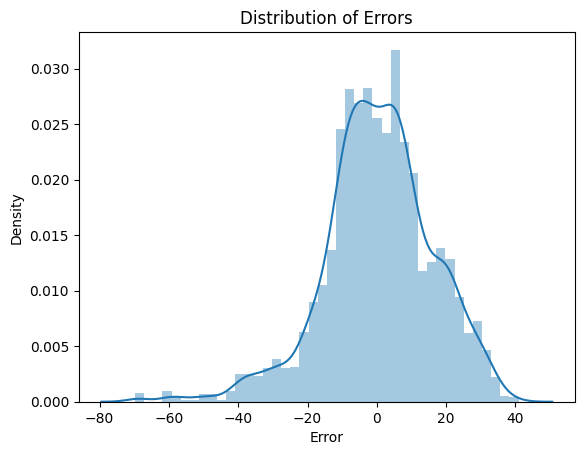

In [261]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(y_test-predicted_score)
plt.title('Distribution of Errors')
plt.xlabel('Error')
plt.ylabel('Density')
plt.show()

# Save the model to a pickle file
with open('ipl_model.pkl', 'wb') as f:
    pkl.dump(grid_search, f)

# Model Evaluation

In [262]:
print({'model': 'Ridge Regression',
       'best_params': grid_search.best_params_,
       'best_score': -grid_search.best_score_,
       'test_score': r2_score(y_test, predicted_score),
       'mse': mean_squared_error(y_test, predicted_score),
       'mae': mean_absolute_error(y_test, predicted_score)
      })

{'model': 'Ridge Regression', 'best_params': {'alpha': 50}, 'best_score': np.float64(328.3032637895307), 'test_score': 0.7522293795934456, 'mse': 251.0423488012823, 'mae': 12.116400791001485}
